In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

meu_dir = '/content/drive/MyDrive/Colab Notebooks/DATA/'

Mounted at /content/drive/


In [ ]:
# fakebr & fcn
df = pd.read_pickle(meu_dir+'news.pkl')

In [ ]:
df.tail()

,index,text,class,fold,features,features_normalized,DistilBERT Multilingua,BERT,DistilBERT,RoBERTa
9255,Br.Corpus/true/165.txt,pf envia perguntas temer sobre suspeita de pro...,0,-1,"[17.0, 7.0, 23.0, 19.0, 4.0, 70.0, 6.0, 7.0, 2...","[0.0909090909090909, 0.07526881720430108, 0.06...","[0.014514356, 0.008530656, 0.03846555, -0.0099...","[-0.20193985, -0.5226437, 0.46868336, -0.00350...","[-0.36339742, 0.7857486, 0.051166058, -0.64756...","[0.3042544, 1.0563827, -0.39549202, -0.3821118..."
9256,Br.Corpus/true/3523.txt,se dependesse só dele mesmo deputado jair bols...,0,-1,"[33.0, 25.0, 100.0, 32.0, 5.0, 171.0, 30.0, 25...","[0.1764705882352941, 0.2688172043010753, 0.293...","[-0.03749506, -0.033387117, 0.05065934, -0.028...","[0.3731324, -0.3448258, 0.7404749, 0.22368652,...","[-0.7858868, 0.51153785, 0.0869052, -0.5411864...","[0.44987923, 0.14891791, 0.31082582, -1.051976..."
9257,Br.Corpus/true/2363.txt,ataque terrorista deixa mortos e feridos em ba...,0,-1,"[10.0, 8.0, 30.0, 18.0, 14.0, 57.0, 7.0, 4.0, ...","[0.053475935828877004, 0.08602150537634409, 0....","[-0.024948822, -0.037642844, -0.022688061, -0....","[-0.05710221, -0.13587737, 0.6859786, 0.574700...","[-0.35180303, 0.7982135, 0.05511549, -0.741719...","[0.15009603, 1.1909198, -0.1610699, -0.6711221..."
9258,Br.Corpus/true/186.txt,suzane richthofen e anna carolina jatobá são l...,0,-1,"[4.0, 2.0, 11.0, 11.0, 3.0, 39.0, 7.0, 3.0, 14...","[0.0213903743315508, 0.021505376344086027, 0.0...","[-0.013970567, 0.018637374, 0.055494092, -0.01...","[0.37800026, -0.09586002, 0.9392674, 0.1973950...","[-0.40225852, 0.8388919, -0.21161911, -0.59834...","[0.70413524, -0.10781592, -0.22003835, -0.0840..."
9259,Br.Corpus/true/402.txt,adolescente suspeito de ser curador jogo balei...,0,-1,"[10.0, 11.0, 15.0, 9.0, 3.0, 44.0, 2.0, 2.0, 1...","[0.053475935828877004, 0.11827956989247312, 0....","[-0.012026974, -0.012726929, -0.015827581, -0....","[0.27077848, -0.0785435, 0.6093684, 0.60272044...","[-0.88760316, 0.43419886, -0.4410904, -0.74014...","[1.8870502, 0.31321263, 0.09041721, -0.5619377..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9260 entries, 0 to 9259
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   9260 non-null   object
 1   text                    9260 non-null   object
 2   class                   9260 non-null   object
 3   fold                    9260 non-null   object
 4   features                9260 non-null   object
 5   features_normalized     9260 non-null   object
 6   DistilBERT Multilingua  9260 non-null   object
 7   BERT                    9260 non-null   object
 8   DistilBERT              9260 non-null   object
 9   RoBERTa                 9260 non-null   object
dtypes: object(10)
memory usage: 723.6+ KB


In [ ]:
df = df.drop(['fold', 'BERT', 'features', 'features_normalized', 'DistilBERT', 'RoBERTa'], axis=1);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9260 entries, 0 to 9259
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   9260 non-null   object
 1   text                    9260 non-null   object
 2   class                   9260 non-null   object
 3   DistilBERT Multilingua  9260 non-null   object
dtypes: object(4)
memory usage: 289.5+ KB


In [ ]:
df['text'][0]

'" #Verificamos: Atentado contra Jair Bolsonaro com checagens em tempo realCandidato do PSL à Presidência da República foi atacado com uma faca durante ato de campanha em Juiz de ForaO candidato à Presidência da República pelo PSL, Jair Bolsonaro, foi esfaqueado na tarde da quinta-feira (6), durante um ato de campanha na cidade de Juiz de Fora, em Minas Gerais. Bolsonaro recebeu atendimento médico no município e se recupera de uma cirurgia. Desde as 17h40, a equipe daLupaestá checando em tempo real as informações que circulam na internet e têm relação com o ataque cometido contra o presidenciável. Esta publicação, que faz parte do projeto de verificação de notíciasdo Facebook, poderá ser atualizada a qualquer momento, ao longo das próximas horas(Nota: Este material não pode ser republicado, reescrito ou redistribuído sem autorização prévia da Lupa).""O suspeito [de esfaquear de Bolsonaro] seria José Adélio Bispo de Oliveira, filiado ao PDT mineiro""Informação divulgada por portais como

In [ ]:
X = df['DistilBERT Multilingua'].tolist()
#X = df['text'].tolist()
y = df['class'].tolist()

len(X), len(y)

(9260, 9260)

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## MLP(Multilayer perceptron) com DistilBERT Multilingua

In [ ]:
import torch
import torch.nn as nn

- Transformar Arrays em Tensors

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

<ipython-input-14-481df7169305>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X_train = torch.FloatTensor(X_train)


#### Definir modelo (rede neural)

In [ ]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = nn.Sequential(
                torch.nn.Linear(self.input_size, self.hidden_size),
                torch.nn.ReLU(),
                torch.nn.Dropout(p=0.25)
            )
            self.fc2 = nn.Sequential(
                torch.nn.Linear(self.hidden_size, self.hidden_size),
                torch.nn.ReLU(),
                torch.nn.Dropout(p=0.25)
            )
            self.fc3 = nn.Sequential(
                torch.nn.Linear(self.hidden_size, 1),
                torch.nn.Sigmoid()
            )

        def forward(self, x):
            fc1 = self.fc1(x)
            fc2 = self.fc2(fc1)
            output = self.fc3(fc2)
            return output


#### Instanciar modelo e funções importantes

In [ ]:
batch_size = 64 # not used
learning_rate = 0.001
num_epochs = 50

In [ ]:
model = Feedforward(512, 512)

cost = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


#### Treino

In [ ]:
model.eval()
y_pred = model(X_test)
before_train = cost(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.6931037306785583


In [ ]:
model.train()
epoch = 80
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train)
    # Compute Loss
    loss = cost(y_pred.squeeze(), y_train)

    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.6932044625282288
Epoch 1: train loss: 0.690510094165802
Epoch 2: train loss: 0.687023937702179
Epoch 3: train loss: 0.6815484762191772
Epoch 4: train loss: 0.6742087602615356
Epoch 5: train loss: 0.6638914942741394
Epoch 6: train loss: 0.6514604687690735
Epoch 7: train loss: 0.6365030407905579
Epoch 8: train loss: 0.6201512813568115
Epoch 9: train loss: 0.6010347604751587
Epoch 10: train loss: 0.5806472897529602
Epoch 11: train loss: 0.5587366819381714
Epoch 12: train loss: 0.5377053022384644
Epoch 13: train loss: 0.5165471434593201
Epoch 14: train loss: 0.4960571527481079
Epoch 15: train loss: 0.4787190854549408
Epoch 16: train loss: 0.46300962567329407
Epoch 17: train loss: 0.44971656799316406
Epoch 18: train loss: 0.438951700925827
Epoch 19: train loss: 0.428653746843338
Epoch 20: train loss: 0.4229516386985779
Epoch 21: train loss: 0.4176551401615143
Epoch 22: train loss: 0.41196727752685547
Epoch 23: train loss: 0.40991583466529846
Epoch 24: train loss: 0.40

In [ ]:
model.eval()
y_pred = model(X_test)
after_train = cost(y_pred.squeeze(), y_test)
print('Test loss after Training' , after_train.item())

Test loss after Training 0.3561951816082001


#### Teste

In [ ]:
correct = 0
total = 0
test_pred = []
for i, test in enumerate(X_test):

  outputs = model(test)
  predicted = outputs.data
  total += 1
  is_fake = predicted.item() > 0.5
  test_pred.append(int(is_fake))
  correct += is_fake == y_test[i]

print(f'Accuracy of MLP on {total} tests: {100 * correct / total} %')

Accuracy of MLP on 3056 tests: 84.4568099975586 %


## SVM(Support vector machine) com DistilBERT Multilingua

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Definir modelo e treino

In [ ]:
## por que o pipeline é tão importante? 51% -> 85%
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### Teste

In [ ]:
correct = 0
total = 0
test_pred = []

outputs = clf.predict(X_test)

for i, output in enumerate(outputs):
  total += 1
  correct += int(output) == y_test[i]
  test_pred.append(int(output))

print(f'Accuracy of the SVM on {total} tests: {100 * correct / total} %')

Accuracy of the SVM on 3056 tests: 85.17670440673828 %


## Matriz de Confusão

In [ ]:
def plot_cm(classes, test_targets, test_preds):
  cm = np.zeros((len(classes), len(classes)), np.int64)
  for i, actual in enumerate(test_targets):
      cm[int(actual.item()), test_preds[i]] += 1

  print(cm)
  fig = plt.figure()

  plt.imshow(cm, interpolation='nearest', cmap='Blues')
  plt.title("Confusion matrix")


  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes, rotation=0)

  thresh = cm.max() / len(classes)
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      coeff = f'{cm[i, j]}'
      plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white"
                  if cm[i, j] > thresh else "black")

  ax = fig.gca()
  ax.set_ylim(len(classes)-.5,-.5)


  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.grid(False)

  plt.show()

In [ ]:
import torch
y_test = torch.FloatTensor(y_test)

[[1296  230]
 [ 223 1307]]


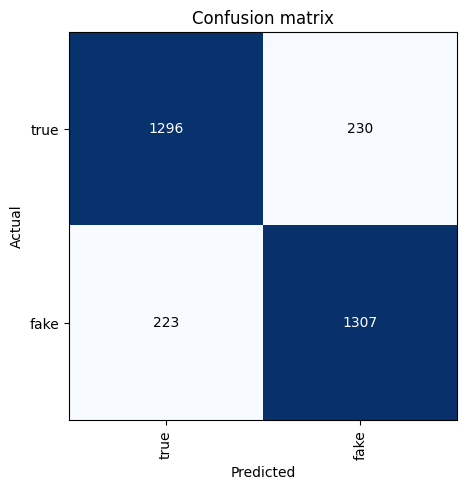

In [ ]:
plot_cm(['true', 'fake'], y_test, test_pred)

# Fine Tuning

In [ ]:
!pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
len(X_train)

6204

In [ ]:
trn, val, preproc = text.texts_from_array(X_train, y_train, class_names=['true', 'fake'],
                                     maxlen=700, preprocess_mode='distilbert',)


/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:850: UserWarning: Transformer models typically only support maxlen <= 512, unless you are using certain models like the Longformer.
  warnings.warn(


preprocessing train...
language: pt
train sequence lengths:
	mean : 236
	95percentile : 634
	99percentile : 1260


Is Multi-Label? False
preprocessing test...
language: pt
test sequence lengths:
	mean : 250
	95percentile : 643
	99percentile : 1216


task: text classification


In [ ]:
model = text.text_classifier('distilbert', trn , preproc=preproc)

Is Multi-Label? False
maxlen is 700
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
930/930 [==============================] - 525s 553ms/step - loss: 0.5945 - accuracy: 0.6616
Epoch 2/1024
930/930 [==============================] - 302s 325ms/step - loss: 113.9300 - accuracy: 0.5137


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


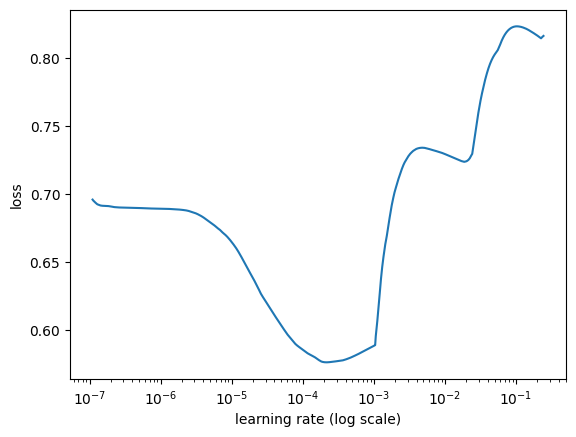

In [ ]:
learner.lr_plot()

In [ ]:
learner.fit_onecycle(2e-4, 3)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/3
931/931 [==============================] - 545s 574ms/step - loss: 0.6619 - accuracy: 0.6033 - val_loss: 0.7364 - val_accuracy: 0.4767
Epoch 2/3
931/931 [==============================] - 531s 570ms/step - loss: 0.6988 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4767
Epoch 3/3
931/931 [==============================] - 531s 571ms/step - loss: 0.6940 - accuracy: 0.4981 - val_loss: 0.6923 - val_accuracy: 0.5233


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
data = [ 'POLÍCIA FEDERAL JÁ TEM PROVAS suficientes para INDICIAR Jair Bolsonaro sobre registro e uso falso de atestado de vacina A Polícia Federal considera que, após tomar os principais depoimentos e colher provas, já tem elementos suficientes para INDICIAR o ex-presidente Jair Bolsonaro pelos crimes de inserção de dados falsos e uso de documentos falsos Típico dos covardes e comportamento genuíno bolsonarista, Jair já abandonou uma gama de pessoas que o apoiaram e depois foram presas ou perderam poder Ft: Guilherme Amado',
        'O presidente da CPMI do 8 de janeiro, Arthur Maia (União-BA), explicou por que o senador Magno Malta (PL-ES) ganhou uma vaga na mesa diretora da comissão, e afirmou que a decisão ocorre para que haja "credibilidade"']

In [ ]:
data = X_test

In [ ]:
y_pred = predictor.predict(X_test)

In [ ]:
y_pred[0], y_test[0]

('fake', 1)

In [ ]:
correct = 0
total = 0
test_pred = []

outputs = y_pred

for i, output in enumerate(outputs):
  total += 1
  correct += int(output == 'fake') == y_test[i]
  test_pred.append(int(output == 'fake'))

print(f'Accuracy of the Fine Tuning on {total} tests: {100 * correct / total} %')


Accuracy of the SVM on 3056 tests: 50.06544502617801 %
